In [1]:
from lognormal_counts_yunting import *

In [2]:
ng_bins=1 # this is the number of redshift bins you want, if you want to generate several GRFs and superpose them
zmin=0.01
zmax=1.0
n_catalog = 3
number_counts = [500] # you want this to be in counts per square degree, since it gets multiplied by n_square_deg 
                        # in the function below. you might get a values from the helgason model
size = 1024 # side length of image to place counts in 
n_square_deg = 64.0

In [3]:
# generate the clustering catalog. check the defaults to 
#make sure they are what you want, especially with ell_min and the like.
tx, ty, grfs = generate_galaxy_clustering(number_counts, size=size, 
                                    ell_min=22.5, n_square_deg=n_square_deg, 
                                    n_catalog=n_catalog, ng_bins=ng_bins, return_grf=True)

1024


/Users/ytcheng/ciber/python_ciber/stack_modelfit/lognormal_counts_yunting.py:66: RuntimeWarning: divide by zero encountered in log10
  amplitude = 10**spline_cl_g(np.log10(ls))


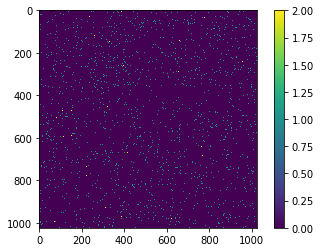

7.9921875
(32000, 2)
No bootstrapping


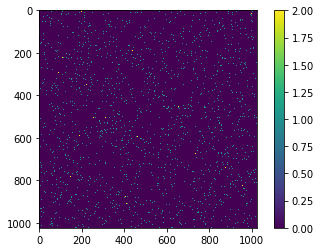

7.9921875
(31906, 2)
No bootstrapping


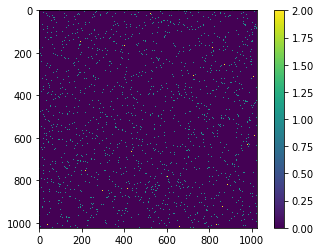

7.9921875
(32000, 2)
No bootstrapping


In [4]:
bins = 3*10**(np.linspace(-3, 1, 20)) # radians

corrs, dcorrs = [], []

for i in range(n_catalog):
    
    cat = np.array([tx[i], ty[i]]).transpose()
    
    # can use this for visualization sanity check that counts make sense
    gmap_unnormalized = make_galaxy_cts_map(cat, [size, size], normalize=False)

    plt.figure()
    plt.imshow(gmap_unnormalized, vmin=0, vmax=2)
    plt.colorbar()
    
    ''' The galaxy catalogs obtained above are going to be in the pixel units, so we should convert these 
    to approximate celestial coordinates 
    (since we invoked the flat sky approximation in generating the clustering)
    The zero point shouldn't matter for computing the 2pt correlation function
    '''
    cat_celestial = np.array(cat)*(np.sqrt(n_square_deg)/size)
    
    # max value should roughly be the number of degrees across FOV
    print(np.max(cat_celestial))
    
    corr, dcorr, _ = get_angular_2pt_func(cat_celestial, bins, nboot=1)
    
    corrs.append(corr)
    dcorrs.append(dcorr)

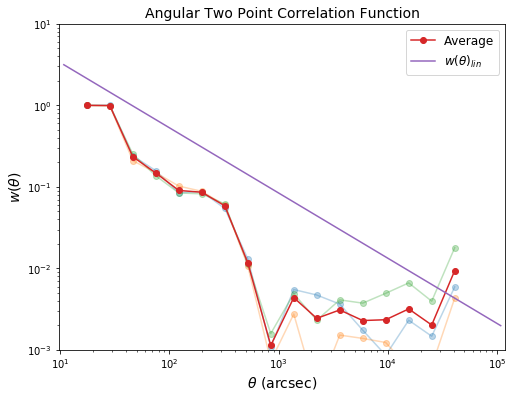

In [5]:
deg_to_arcsec = 3600

plt.figure(figsize=(8, 6))
plt.title('Angular Two Point Correlation Function', fontsize=14)
for i in range(n_catalog):
    if dcorrs[i] == []:
        # taking the absolute value of the correlation function in these lines
        # but not sure if thats the right thing to do
        plt.plot(bins[1:]*deg_to_arcsec, np.abs(corrs[i]), marker='o', alpha=0.3)
    else:
        plt.errorbar(bins[1:]*deg_to_arcsec, np.abs(corrs[i]), yerr=dcorrs[i], marker='o')

plt.plot(bins[1:]*deg_to_arcsec, np.mean(np.abs(corrs), axis=0), marker='o', label='Average')
plt.plot(bins*deg_to_arcsec, linear_ang2pt(bins), label='$w(\\theta)_{lin}$')    
plt.legend(fontsize='large')
plt.xscale('log')
plt.xlim(0.9*np.min(bins)*deg_to_arcsec, 1.1*np.max(bins)*deg_to_arcsec)
plt.yscale('log')
plt.ylim(1e-3, 1e1)
plt.xlabel('$\\theta$ (arcsec)', fontsize=14)
plt.ylabel('$w(\\theta)$', fontsize=14)
plt.show()